In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import make_classification

In [9]:
x,y = make_classification(n_samples = 100 , n_features =2 , n_informative = 1,n_redundant=0,n_classes=2,n_clusters_per_class = 1,random_state =41,hypercube = False,class_sep = 20)

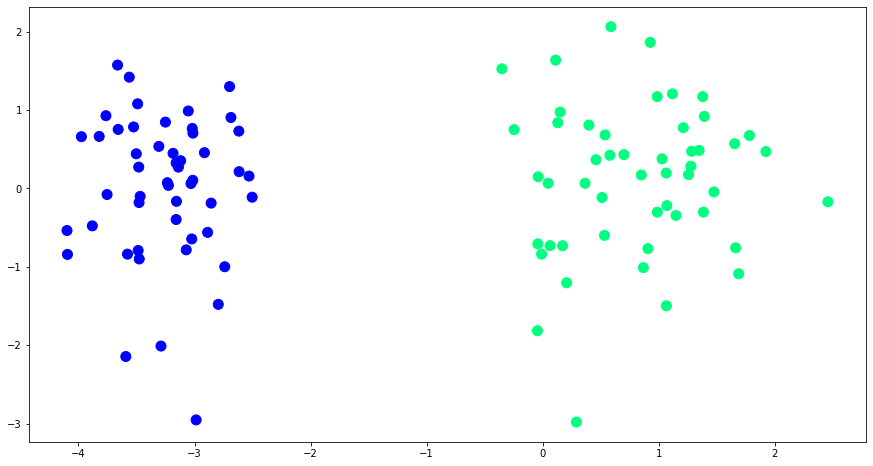

In [11]:
plt.figure(figsize = (15,8))
plt.scatter(x[:,0],x[:,1],c=y,cmap = 'winter', s = 100)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

In [20]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


In [22]:
logi= LogisticRegression(penalty='none',solver='sag')
logi.fit(x_train,y_train)


C:\Users\vishal\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(penalty='none', solver='sag')

In [23]:
print(logi.coef_)

print(logi.intercept_)

[[4.69195891 0.25626358]]
[5.59844857]


In [24]:
logi.coef_[0]

array([4.69195891, 0.25626358])

In [25]:
logi.coef_[0][0]

4.691958911840596

In [26]:
logi.coef_[0][1]

0.25626358184312126

In [27]:
# slope and intercept for seprable line line
m1 = -((logi.coef_[0][0])/logi.coef_[0][1])
b1 = -(logi.intercept_/logi.coef_[0][1])

In [32]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input +b1

In [33]:
x_input.shape

(100,)

(-3.0, 2.0)

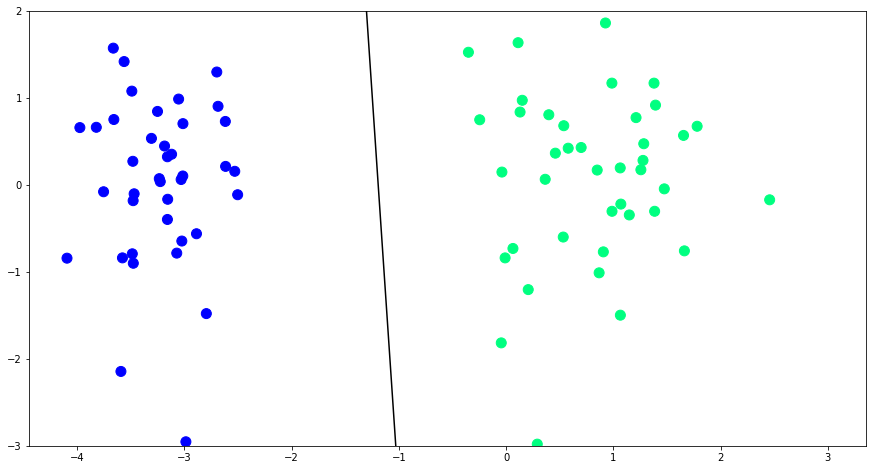

In [37]:
# with the help of sklearn we plot seprable line 
plt.figure(figsize = (15,8))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap = 'winter', s = 100)
plt.plot(x_input,y_input,color = 'black')
plt.ylim(-3,2)

# Now We create seprable line with the help of gradient descent (mannually)

In [41]:
np.insert(x,0,1,axis = 1) # we add one column at the start with 1

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [42]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [43]:
def gd(x,y):
    
    x = np.insert(x,0,1,axis = 1) # we add one column at the start with 1
    weight = np.ones(x.shape[1]) # we create coefficient lets 1
    lr = 0.5 # learning rate
    
    for i in range(5000):
        y_pred = sigmoid(np.dot(x,weight))
        weight = weight + lr*(np.dot((y-y_pred),x)/x.shape[0])
    return weight[1:],weight[0]

In [46]:
coef,intercept = gd(x_train,y_train)

In [47]:
print(coef)
print(intercept)

[4.87154369 0.26713198]
5.860843054424071


In [48]:
m2 = -(coef[0]/coef[1])
b2 = -(intercept/coef[1])

In [49]:
print(m2,b2)

-18.236467501406953 -21.93987793575448


In [51]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m2*x_input1 + b2

(-3.0, 2.0)

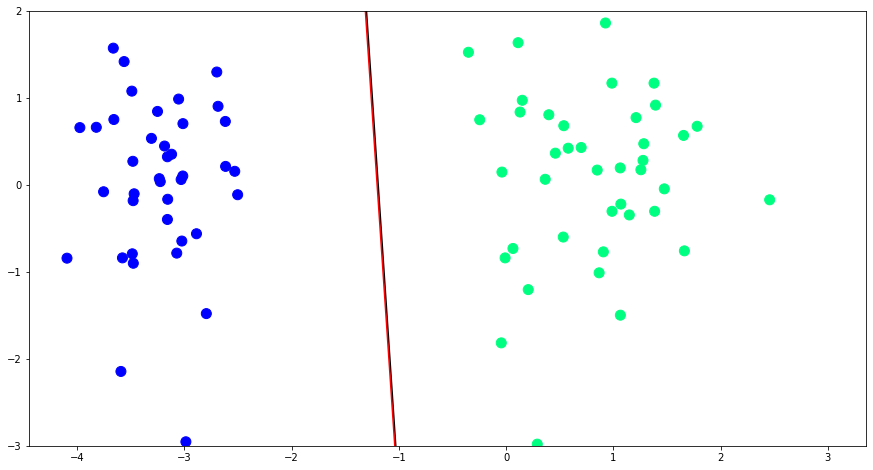

In [52]:
plt.figure(figsize = (15,8))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap = 'winter', s = 100)
plt.plot(x_input,y_input,color = 'black')#with the help of sklearn we plot seprable line 
plt.plot(x_input1,y_input1,color = 'red') # Now We create seprable line with the help of gradient descent (mannually)
plt.ylim(-3,2)

In [53]:
# both lines are overlap with each other 